Data Cleaning and Preprocessing

In [54]:
#Importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



In [55]:
#Data collection and preprocessing
titanic_data=pd.read_csv('Titanic-Dataset.csv')


In [56]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
#checking the no oof row and columns
titanic_data.shape

(891, 12)

In [58]:
#getting some info about that data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
#checking missing values in each columns
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
# Handling the missing values
#drop the cabin column from the dataframe
titanic_data=titanic_data.drop(columns='Cabin',axis=1) # 0 represents row and 1 represents column

In [61]:
#replace all  the missing value in age column by replacing with mean value
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())


In [62]:
#finding repeated values(mode value of embarked column)
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [63]:
#replacing the missing value with mode value
print(titanic_data['Embarked'].mode()[0])
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

S


In [64]:
#checking missing values again
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [65]:
#getting some statstical data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
#finding the number ofpeople survived and not survived
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

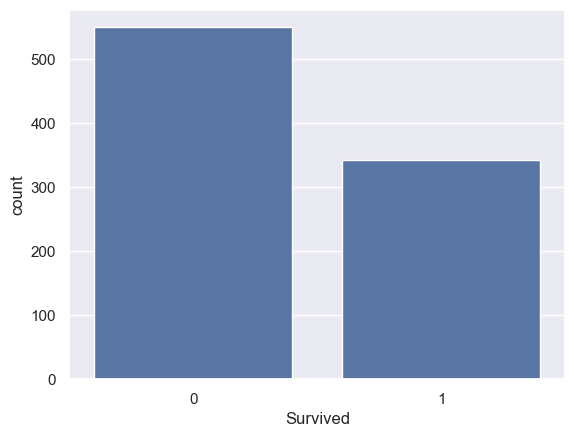

In [67]:
#data visualization
sns.set()
#making a countplot for 'Survived' column
sns.countplot(x='Survived',data=titanic_data)

In [68]:
#replacing categorical value with numerical value['Sex' ,'Embarked'] columns
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [69]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [70]:
titanic_data=titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':0,'S':1,'Q':2}})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11024\233447984.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data=titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'C':0,'S':1,'Q':2}})


In [71]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


In [72]:
#identifing numerical columns
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']


In [74]:


scaler = StandardScaler()
titanic_data_scaled = titanic_data.copy()

# Apply scaler to numerical columns
titanic_data_scaled[num_cols] = scaler.fit_transform(titanic_data[num_cols])


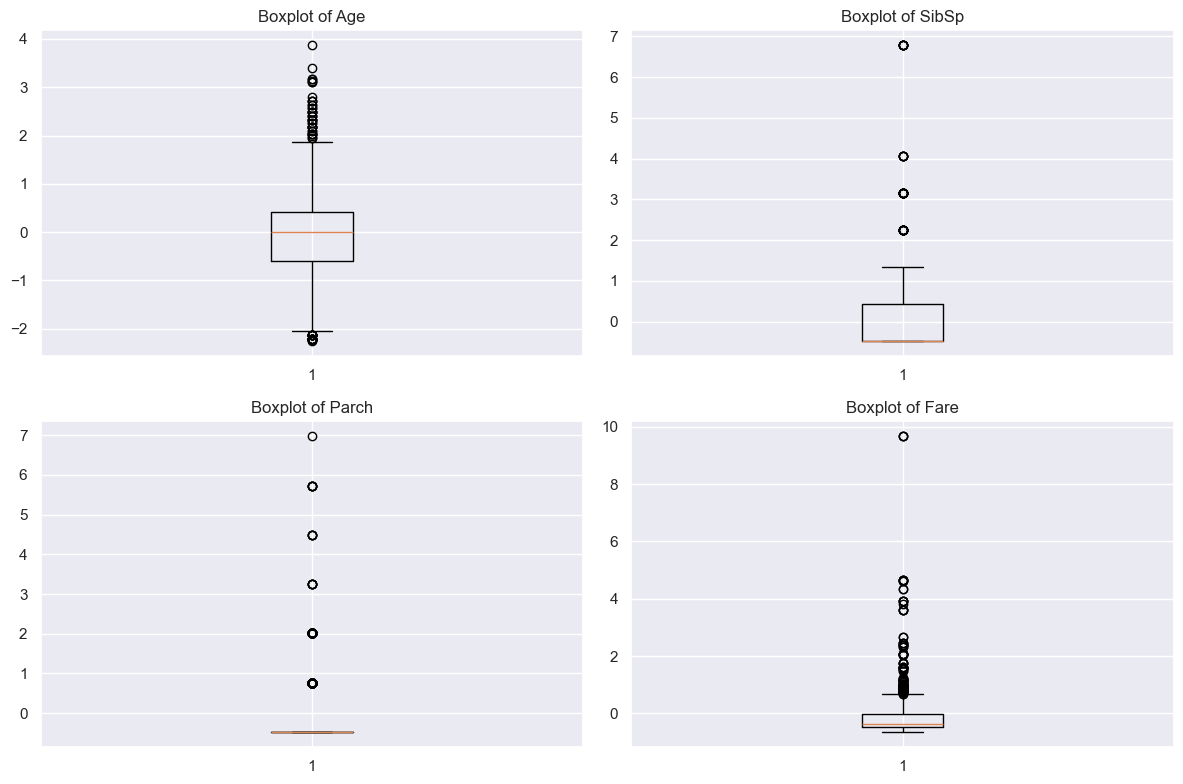

In [75]:
#visualizing outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(titanic_data_scaled[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [76]:
#Remove outliers

# Create a copy before cleaning
cleaned_data = titanic_data.copy()

for col in num_cols:
    Q1 = cleaned_data[col].quantile(0.25)
    Q3 = cleaned_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]


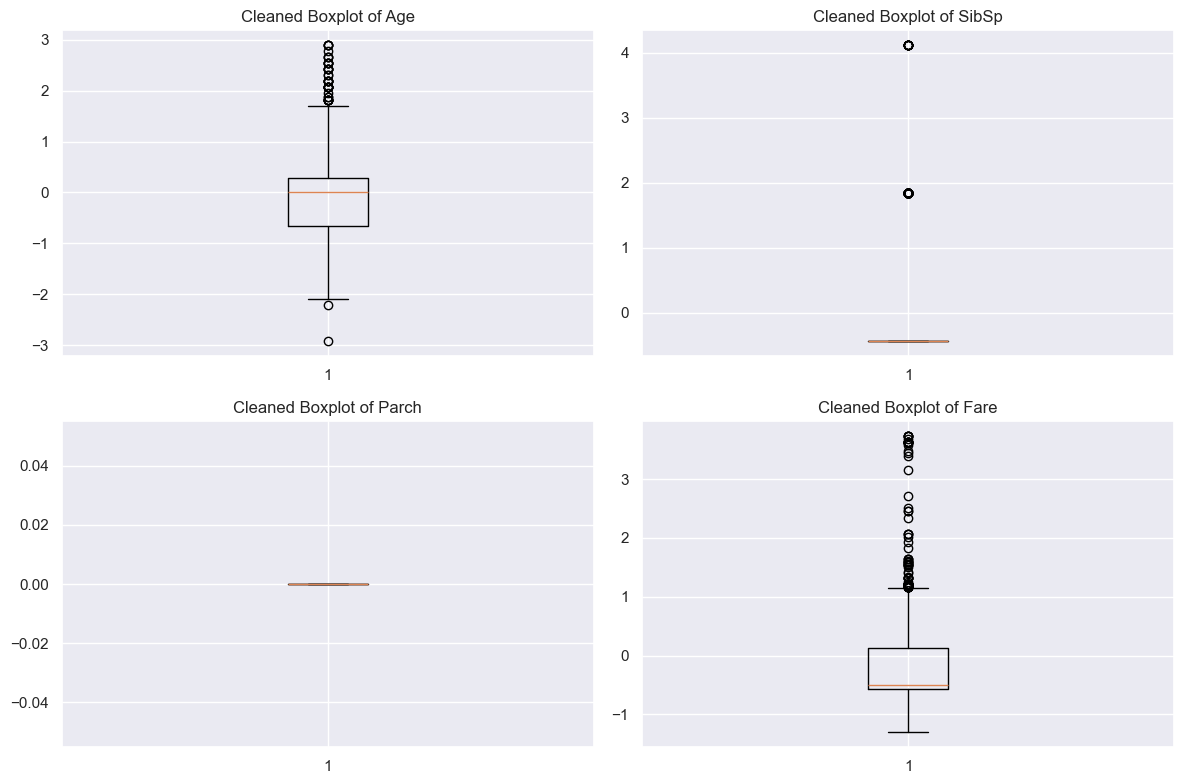

In [78]:
#Visualize the clean data
# Re-scale the cleaned data
cleaned_scaled = cleaned_data.copy()
cleaned_scaled[num_cols] = scaler.fit_transform(cleaned_data[num_cols])

plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(cleaned_scaled[col])
    plt.title(f'Cleaned Boxplot of {col}')

plt.tight_layout()
plt.show()
